# Holmes and Watson in Conan Dolye's _The Sign of Four_ and _A Study in Scarlet_

## Fangxian Liu (Fiona)


## Foreword

Sir Arthur Conan Dolye's 'consulting detective' Sherlock Holmes has engendered a worldwide frenzy for this series. _A Study in Scarlet_ , published in 1887, marks the first appearance of the beloved Sherlock Holmes and Dr.Watson, investigating myterious deaths revolving around the scarlet word 'RACHE', written in blood blatantly in the crime scene, which is the German word for 'revenge'. Following _A Study in Scarlet_ is _The Sign of the Four_, pubished three years later, featuring the same genius detective Holmes and his company, Dr.Watson. This time, the web of relationships is even more complex, introducing Watson's future wife, Mary Morstan's plight regarding his father's disappearance. By looking at the distance matrix plot among important characters, the dispersion plot of the names of the characters, and close reading of the concordances, an understanding of the importance of each character, and how their status vary over time.

## Extracting my novels via corpus-db

In [1]:
# Import all your libraries here, and only here, please.
import json
import requests
import spacy
import pandas as pd
import nltk
from nltk import word_tokenize as tokenize
from nltk import sent_tokenize as st
from nltk import pos_tag, pos_tag_sents
from nltk.corpus import wordnet as wn
from nltk.text import Text
from collections import Counter
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob as tb
# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current

# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]

C:\Users\11601\Anaconda3\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
C:\Users\11601\Anaconda3\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


In [2]:
response4 = requests.get('http://corpus-db.org/api/author/Doyle, Arthur Conan/fulltext')

response4.ok

parsed4 = json.loads(response4.text)

doyleNovels = [item['text'] for item in parsed4[:18]]




def getLabels(FirstName,LastName,Start,End):
    response = requests.get('http://corpus-db.org/api/author/{}, {}'.format(FirstName, LastName))
    if response.ok:
        parsed = json.loads(response.text)
        labels = [item['title'] for item in parsed[Start:End]]
    return labels


doyleLabels = [label for label in getLabels( 'Doyle','Arthur Conan',0,18)]


In [3]:
doyleLabels

['The Return of Sherlock Holmes',
 'The Poison Belt',
 'The Lost World',
 'The Return of Sherlock Holmes',
 'A Study in Scarlet',
 'The Stark Munro Letters: Being series of twelve letters written by J. Stark Munro, M.B., to his friend and former fellow-student, Herbert Swanborough, of Lowell, Massachusetts, during the years 1881-1884',
 'The Captain of the Polestar, and Other Tales',
 'The Parasite: A Story',
 'Beyond the City',
 'Round the Red Lamp: Being Facts and Fancies of Medical Life',
 'The Vital Message',
 'Tales of Terror and Mystery',
 'The Memoirs of Sherlock Holmes',
 'The White Company',
 'The New Revelation',
 'The Adventures of Gerard',
 'The Adventures of Sherlock Holmes',
 'The Sign of the Four']

In [4]:
Scarlet = doyleNovels[4]

In [5]:
Four = doyleNovels[17]

In [6]:
nlp = spacy.load('en_core_web_lg')

In [6]:
len(Scarlet)

242949

In [7]:
len(Four)

233384

In [9]:
fourDoc = nlp(Four)

In [10]:
scarletDoc = nlp(Scarlet)

## Functions to visualize distance matrices as heat maps

In [11]:

#nlp the texts
def distbetween(l1,l2): #average absolute value distances between two lists
    dist = []
    for i in l1:
        for j in l2:
            d = abs(i-j)
            dist.append(d)
    return mean(dist)
        
def getCharacterDistances(doc): #input nlp Docs
    charactersStr = [word.text.strip() for word in doc if (len(word.text.strip())>0 and word.ent_type_ == 'PERSON')]#objects, replace Docname
    charactersStr = list(set([word for word in charactersStr if Counter(charactersStr)[word] >= 10]))
    charactersObj = [word for word in doc if word.text.strip() in charactersStr]
    indexes = [[] for _ in range(len(charactersStr))]        
    for ob in charactersObj:
        indexes[charactersStr.index(ob.text.strip())].append(ob.i)
    distances = [[0 for _ in range(len(charactersStr))] for _ in range(len(charactersStr))]
    for i,cha1 in enumerate(indexes):
        for cha2 in indexes[i+1:]:
            distances[i][indexes.index(cha2)] = distbetween(cha1,cha2)
            distances[indexes.index(cha2)][i] = distbetween(cha1,cha2)   
                                                                        
    return distances, charactersStr
        

In [12]:
def PlotResults(doc):
    docDistances, docCharacters = getCharacterDistances(doc)
    flatDistances = []
    for item in docDistances:
        for d in item:
            flatDistances.append(d)
    R = np.array(flatDistances)
    n = int(np.sqrt(R.size))
    C = R.reshape((n,n))
    plt.matshow(C, cmap = 'ocean')
    ax = plt.gca()
    xlabels = docCharacters
    ylabels = xlabels
    ax.set_xticklabels(xlabels)
    ax.set_yticklabels(ylabels)
    print(docCharacters)
    print(len(docCharacters))
    print(n)
    for i in range(n):
        for j in range(n):
            plt.text(j,i, round(C[i,j],2), horizontalalignment='center', verticalalignment='center')
    plt.show()

The larger the distances (which means that if the characters are greater apart), the lighter the color. Thus deeper color reveals closer, more intimate correlations.

['Sholto', "'s", 'Jones', 'Sherlock', 'Holmes', 'Sahib', 'Aurora', 'I.', 'Toby', 'Watson', 'Athelney', 'Jonathan', 'Small', 'Bartholomew', 'Smith', 'Morstan', 'Thaddeus', 'Forrester']
18
18


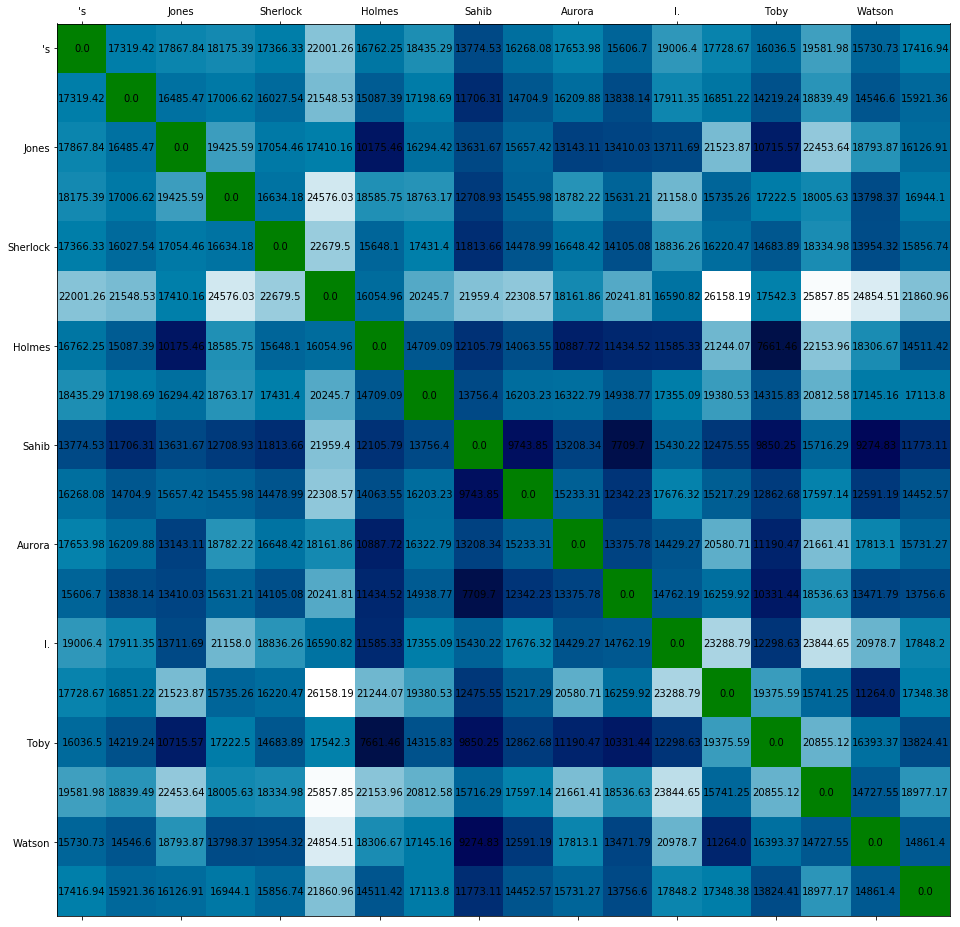

In [13]:
PlotResults(fourDoc)

Some prominent deep hues in the distance matrix are Holmes vs Jones/Toby/Aurora/Sahib, Watson vs. Sahib/Aurora, Toby vs. Jones/Sahib/Aurora.

From the distance matrix plot of major characters in _A Study in Scarlet_, it appears that Ferrier vs. Sherlock/Holmes/Lestrade/Joseph/Gregson, Joseph vs. Ferrier are closer in the their occurrences.

## Exploring coocurrences

In [10]:
plt.rcParams['figure.figsize'] = [20, 10]

In [8]:
fourTokens = tokenize(Four)

In [9]:
fourText = Text(fourTokens)

C:\Users\11601\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


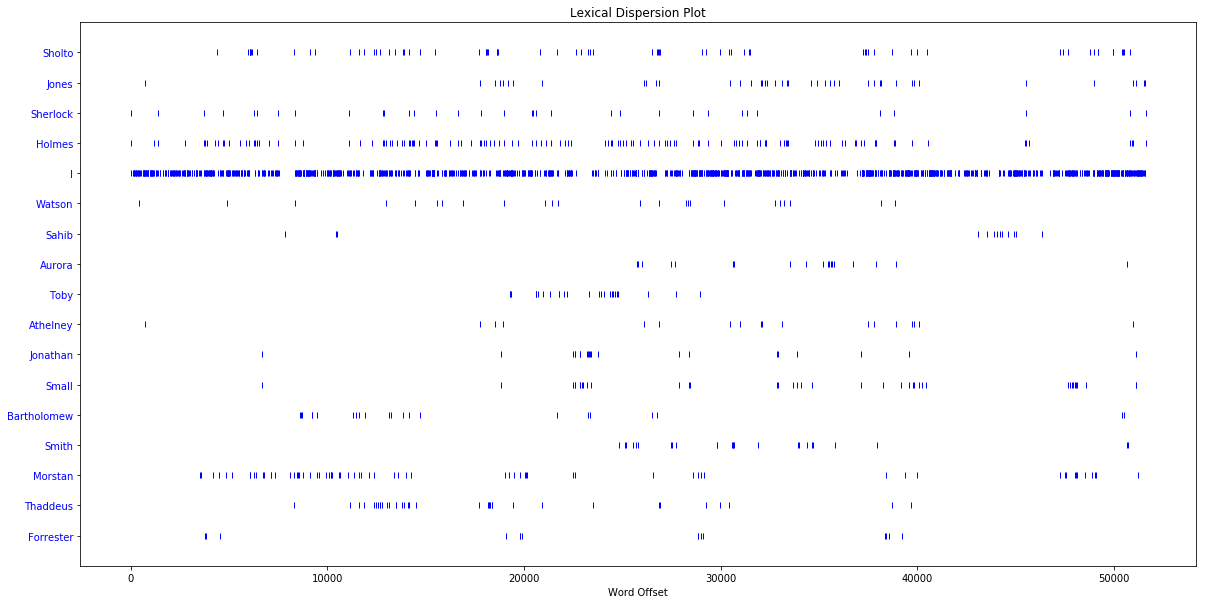

In [48]:

fourText.dispersion_plot(['Sholto', 'Jones', 'Sherlock', 'Holmes','I','Watson' ,'Sahib', 'Aurora', 'Toby', 'Athelney', 'Jonathan', 'Small', 'Bartholomew', 'Smith', 'Morstan', 'Thaddeus', 'Forrester'])
# Captain Morstan, Mary Morstan's father, was a corrupt guard
# Thaddeus Sholto, son of Major Sholto, anonymous sender of pearls
# Bartholomew, Thaddeus's brother
# Aurora, a steam launch that Small hired to escape
# Jonathan Small, the murderer
# Indian background, Agra treasure

In a similar fashion, the dispersion plot of 'Sherlock', 'Holmes', 'I','Watson','Lestrade', 'Joseph', 'John', 'Gregson', 'Ferrier', 'Drebber', 'Stangerson', 'Hope', 'Lucy', 'Charpentier', and 'Jefferson'throughout _A Study in Scarlet_ is plotted (which is omitted here). The only obvious difference between the two plots is that unlike the 'Sherlock' and 'Holmes' in _The Sign of the Four_, in _A Study in Scarlet_ the dispersions of 'Sherlock' and 'Holmes' haulted abruptly in some place, with scarce appearance afterwards. However. the use of 'I' also permeated the entire novel. 

From the dispersion plot above, we could draw the conclusion that the structure of the narratives changed when Conan Doyle wrote his second novel featuring Holmes. In the later _The Sign of the Four_, Doyle rendered Holmes in a more pivotal role throughout the whole story. On the other hand, in _A Study in Scarlet_, Holmes was crucial in the investigative process, which was the Part I of the novel, 'The reminiscences of Watson', but rarely appeared while the mystery was unfolding in the second half of the novel, 'The country of the Saints',which was consisted of the self-confession of the murderer Hope.

Despite the changes in Holmes' role in pushing forward the narrated investigation, Doyle's adamancy in the use of first person point of view of Watson was demonstrated gracefully in the Dispersion Plots. That brought up the question of Holmes' and Watson's relative status in the two novels, and their relationships. From the Distance Matrix Plots, the semantic relevance of Holmes in Watson's narrative could be seen already (see figures above for 'I vs.Holmes' distance in _The Sigh of the Four_.)

But what about the frequency of references to 'Holmes','Watson', and 'I' in the two novels, respectively?

## Concordances of Holmes, Watson, and the narrator 'I'

Since the lengths of _The Sign of the Four_  and _A Study in Scarlet_ are 233384, 242949 respectively, they could be considered to be of conparable lengths for a rough estimate for the frequency by only the number of times of appearances.

In [13]:
fourText.concordance('Holmes', lines = 30, width = 50)

Displaying 30 of 133 matches:
of Deduction Sherlock Holmes took his bottle from 
e Continent , '' said Holmes , after a while , fil
ly , '' said Sherlock Holmes , lightly . `` He has
 is unworthy of you , Holmes , '' I said . `` I co
e seat which Sherlock Holmes placed for her , her 
ave come to you , Mr. Holmes , '' she said , `` be
ch I find myself . '' Holmes rubbed his hands , an
` The date ? '' asked Holmes , opening his note-bo
ar case , '' remarked Holmes . `` I have not yet d
ng , '' said Sherlock Holmes . `` Has anything els
` Thank you , '' said Holmes . `` The envelope too
ot be later , '' said Holmes . `` There is one oth
rce of character . '' Holmes shook his head . `` L
half-past five before Holmes returned . He was bri
 may be very obtuse , Holmes , but I fail to see w
es , '' said Sherlock Holmes , pensively . `` But 
, but I observed that Holmes took his revolver fro
stions which Sherlock Holmes put to her . `` Major
 me . It is here . '' Holmes unfolded the paper ca
o

In [14]:
fourText.concordance('Watson',lines = 30, width = 50)

Displaying 24 of 24 matches:
rhaps you are right , Watson , '' he said . `` I s
nd -- yes , why , Dr. Watson is the very man . You
es , and this is Dr . Watson . '' `` A doctor , eh
ncy . '' `` You see , Watson , if all else fails m
ng devilish in this , Watson , '' said he , more m
emonstration '' Now , Watson , '' said Holmes , ru
he table . See here , Watson ! This is really a ve
nce more . `` My dear Watson , try a little analys
 -- A word with you , Watson . '' He led me out to
 them down with you , Watson . I am going to do a 
eaves . `` That you , Watson ? '' he cried . `` Ye
r a six-mile trudge , Watson ? '' `` Certainly , '
 here with a wherry , Watson . We shall take it an
erlock Holmes and Dr. Watson , who had called at t
ained . ' Mark that , Watson . Now , then , listen
ce , amiable people , Watson ! If this fellow had 
in time . Look here , Watson ; you look regularly 
 off down the river , Watson , '' said he . `` I h
t to open it. -- Eh , Watson ? '' `` It would be a
ce

In [13]:
fourText.concordance('I',lines = 30, width = 50)

Displaying 30 of 1219 matches:
 Doyle Contents Chapter I The Science of Deductio
s a day for many months I had witnessed this perf
trary , from day to day I had become more irritab
 me at the thought that I had lacked the courage 
otest . Again and again I had registered a vow th
d registered a vow that I should deliver my soul 
nd the experience which I had had of his many ext
it was the Beaune which I had taken with my lunch
eration of his manner , I suddenly felt that I co
 , I suddenly felt that I could hold out no longe
Which is it to-day ? '' I asked , -- '' morphine 
 '' `` No , indeed , '' I answered , brusquely . 
e Afghan campaign yet . I can not afford to throw
atson , '' he said . `` I suppose that its influe
 physically a bad one . I find it , however , so 
'' `` But consider ! '' I said , earnestly . `` C
endowed ? Remember that I speak not only as one c
ntricate analysis , and I am in my own proper atm
own proper atmosphere . I can dispense then with 
ficial stimulants .

In [14]:
scarletText.concordance('Sherlock',lines = 30, width = 50)

Displaying 30 of 51 matches:
[ 2 ] CHAPTER I. MR. SHERLOCK HOLMES . IN the year
. `` You do n't know Sherlock Holmes yet , '' he s
 `` Dr. Watson , Mr. Sherlock Holmes , '' said Sta
st . Now we have the Sherlock Holmes ' test , and 
 , too , '' remarked Sherlock Holmes , sticking a 
ng you together . '' Sherlock Holmes seemed deligh
he following morning Sherlock Holmes followed me w
t ran in this way -- SHERLOCK HOLMES -- his limits
t in an appearance , Sherlock Holmes used to beg f
ual , and found that Sherlock Holmes had not yet f
hat is it ? '' asked Sherlock Holmes . `` Why , th
lose your money , '' Sherlock Holmes remarked calm
side of stories . '' Sherlock Holmes rose and lit 
 of a detective ? '' Sherlock Holmes sniffed sardo
of Marines , '' said Sherlock Holmes . `` Brag and
e stair . `` For Mr. Sherlock Holmes , '' he said 
-- -- '' MY DEAR MR. SHERLOCK HOLMES , -- '' There
 I had imagined that Sherlock Holmes would at once
 in a cab ? '' asked Sherlock Holmes . `` No , sir
ch

In [15]:
scarletText.concordance('Watson',lines = 30, width = 50)

Displaying 9 of 9 matches:
niscences of_ JOHN H. WATSON , M.D. , _late of the
doing with yourself , Watson ? '' he asked in undi
his features . `` Dr. Watson , Mr. Sherlock Holmes
and Grove . Apply Dr. Watson , 221B , Baker Street
ened it . `` Does Dr. Watson live here ? '' asked 
 . Of course , Doctor Watson , this is strictly be
 duly recorded in Dr. Watson 's Journal , to which
REMINISCENCES OF JOHN WATSON , M.D . OUR prisoner 
otnote 2 : `` JOHN H. WATSON , M.D . `` : the init


In [16]:
scarletText.concordance('I',lines = 30, width = 50)

Displaying 30 of 928 matches:
STUDY IN SCARLET . PART I . ( _Being a reprint fr
LMES . IN the year 1878 I took my degree of Docto
eted my studies there , I was duly attached to th
t the time , and before I could join it , the sec
 On landing at Bombay , I learned that my corps h
 the enemy 's country . I followed , however , wi
dahar in safety , where I found my regiment , and
sfortune and disaster . I was removed from my bri
 Berkshires , with whom I served at the fatal bat
ttle of Maiwand . There I was struck on the shoul
the subclavian artery . I should have fallen into
olonged hardships which I had undergone , I was r
which I had undergone , I was removed , with a gr
ital at Peshawar . Here I rallied , and had alrea
pon the verandah , when I was struck down by ente
d of , and when at last I came to myself and beca
d became convalescent , I was so weak and emaciat
ng me back to England . I was dispatched , accord
empting to improve it . I had neither kith nor ki
er such circumstance

In both novels, the concordance test of Holmes and Watson reveal that they occurred frequently in conversations, which leads me to run a sentimental analysis to discover Watson's attitudes towards Holmes, and perhaps Holmes attitudes towards Watson. Since the texts are mainly their conversations and Watson's narrations, a rough feeling of those attitudes mentioned above could be sketched out.

## Sentimental analysis

Analyses here are subject to the confines and flaws of the easy but dirty method of sentimental analysis --- using the _textblob_ library.

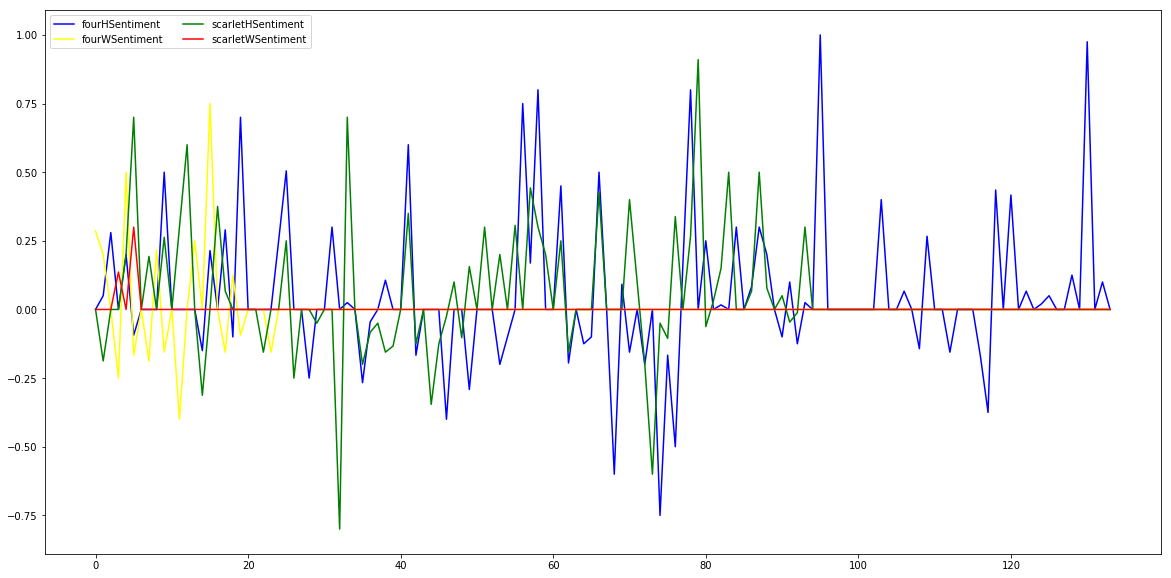

In [17]:
fourSent = st(Four)

len(fourSent)

scarletSent = st(Scarlet)



len(scarletSent)

fourHSent = [sent for sent in fourSent if 'Holmes' in sent or 'Sherlock' in sent ]

len(fourHSent)

fourHSentiment = [tb(sent).sentiment.polarity for sent in fourHSent]



fourWSent = [sent for sent in fourSent if 'Watson' in sent]

fourWSentiment = [tb(sent).sentiment.polarity for sent in fourWSent]



scarletSent = st(Scarlet)

scarletHSent = [sent for sent in scarletSent if 'Holmes' in sent or 'Sherlock' in sent]

scarletHSentiment = [tb(sent).sentiment.polarity for sent in scarletHSent]



scarletWSent = [sent for sent in scarletSent if 'Watson' in sent]

scarletWSentiment = [tb(sent).sentiment.polarity for sent in scarletWSent]



sentiments = pd.DataFrame([fourHSentiment, fourWSentiment, scarletHSentiment, scarletWSentiment], index = ['fourHSentiment', 'fourWSentiment', 'scarletHSentiment', 'scarletWSentiment']).T

sentiments = sentiments.fillna(0)

sentiments

colors = ['blue','yellow','green','red']

fig, axes = plt.subplots()
sentiments.plot(color=colors,ax=axes)
plt.legend(ncol=2, loc='best')

Though failed to isolate the sentences which describe Holmes, or Watson, _textblob_ along with sentence tokenizer still did a (visually) stunning job in delineating the sentiments of sentences in which Holmes or Watson appeared.

It seems that the major trend is for the sentiments of sentences where Watson appeared to flutuate in a short span, with only one or two peaks, whereas sentiments of sentences where Holmes appeared fluctuate much more violently, with 4 or 5 peaks and valleys.

Does this suggest that Holmes is a more sentimental character than Watson? Perhaps it's because through the lenses of Watson, he evaded emotional judgements, or involvements, towards himself, and concentrated more on his intimate friend, Sherlock Holmes?

Also noteworthy is that the sentiments of sentences where Holmes appeared behaved in similar trends in the two novels, and the same applied to Watson, which is probably of Conan Doyle's distinct style, at least in this period of his career.

## Adjectives for Holmes and Watson

Noticing the fluctuating sentiments in Holmes image, I can't help but wonder what adjectives Conan Doyle would use to describe Sherlock Holmes. Compared to Holmes, Watson's sentiments appeared to be much more stabilized. What adjectives would Conan Doyle make use of when it comes to Watson, then?

In [20]:
def getAdj(taggedText): 
    adjectives = []
    for pair in taggedText: 
        word = pair[0]
        pos = pair[1]
        if pos == 'JJ': 
            adjectives.append(word)
    return adjectives

fourHadj = [getAdj(pos_tag(tokenize(sent))) for sent in fourHSent]

fourWadj = [getAdj(pos_tag(tokenize(sent))) for sent in fourWSent]

scarletHadj = [getAdj(pos_tag(tokenize(sent))) for sent in scarletHSent]

scarletWadj = [getAdj(pos_tag(tokenize(sent))) for sent in scarletWSent]



In [25]:
def getList(nested):
    l = []
    for m in nested:
        for n in m:
            l.append(n)
    return l
fourHadj = getList(fourHadj)
fourWadj = getList(fourWadj)
scarletHadj = getList(scarletHadj)
scarletWadj = getList(scarletWadj)

In [27]:
Counter(fourHadj).most_common(10)



[('same', 4),
 ('long', 2),
 ('mere', 2),
 ('sharp', 2),
 ('great', 2),
 ('curious', 2),
 ('other', 2),
 ('open', 2),
 ('morose', 1),
 ('incorrect', 1)]

In [28]:
Counter(fourWadj).most_common(10)



[('little', 2),
 ('devilish', 1),
 ('first', 1),
 ('six-mile', 1),
 ('able', 1),
 ('scientific', 1),
 ('right', 1),
 ('amiable', 1),
 ('white', 1),
 ('dear', 1)]

In [29]:
Counter(scarletHadj).most_common(10)



[('little', 4),
 ('long', 3),
 ('good', 3),
 ('last', 2),
 ('many', 2),
 ('sharp', 2),
 ('utmost', 2),
 ('own', 2),
 ('much', 2),
 ('self-satisfied', 1)]

In [30]:
Counter(scarletWadj).most_common(10)

[('old', 1), ('such', 1), ('own', 1)]

Adjectives in sentences where Holmes appeared reflect his obessesion with solving enigmas: his 'curious' brain craved for more mysteries, his 'sharp' mind could be 'morose' and unsatisfied when nothing out of the ordinary came up. On the other hand, unlike 'sharp', which occurred along with Holmes in both novels, adjectives in sentences where Watson appeared were scattered in a wider range, and most of them were merely mentioned once in the novels, suggesting that they may not be the adjectives to describe Watson himself. This perhaps coincides with Conan Doyles' intention: he featured the mysteries and other figures such as Watson to build up his ingenious consulting detective, Sherlock Holmes.

## Explorations of Holmes' addictions: drugs and wines

As Dr Andrzej Diniejko, D.Litt put it in "Sherlock Holmes's Addictions":
   

Sherlock Holmes, the most famous consulting detective in literature, used occasionally cocaine and morphine to escape, as he said, from “the dull routine of existence.” This was nothing unusual in Victorian times because sale of opium, laudanum, cocaine and morphine was legal. Victorian users took these dangerous drugs as self-medication and as recreation.

   

Holmes's recreational use of drugs can be explained in two ways. Firstly, he believed that he needed stimulation for his 'overactive' brain in periods when he did not have interesting cases to solve, and secondly, he did not understand, like most Victorians, the side effects of drug use. Apart from drugs, Holmes was also a compulsive smoker and an avid drinker of good alcohols, but never in excess.
                                           (Dr Andrzej Diniejko and D.Litt, 2013)

In [33]:
def get_hyponyms(synset):
    hyponyms = set()
    for hyponym in synset.hyponyms():
        hyponyms |= set(get_hyponyms(hyponym))
    return hyponyms | set(synset.hyponyms())

drugs = wn.synsets('drug',pos = 'n')[0]


wine = wn.synsets('wine',pos = 'n')[0]


drugsRaw = get_hyponyms(drugs)
wineRaw = get_hyponyms(wine)

nestedDrug = [synset.lemma_names() for synset in drugsRaw]
nestedWine = [synset.lemma_names() for synset in wineRaw]

def getList(nested):
    l = []
    for m in nested:
        for n in m:
            l.append(n)
    return l

Drug = [item.lower() for item in getList(nestedDrug)]
Wine = [item.lower() for item in getList(nestedWine)]


fourDL = []
fourWL = []
for word in fourTokens:
    if word.lower() in Drug:
        fourDL.append(word)
    if word.lower() in Wine:
        fourWL.append(word)
        

scarletDL = []
scarletWL = []
for word in scarletTokens:
    if word.lower() in Drug:
        scarletDL.append(word)
    if word.lower() in Wine:
        scarletWL.append(word)

comparison = pd.DataFrame([Counter(fourDL), Counter(fourWL),Counter(scarletDL),Counter(scarletWL)], index = ['fourDL','fourWL','scarletDL','scarletWL']).fillna(0).T

comparison['fourDfreq'] = comparison['fourDL'] / len(fourTokens)

comparison['fourWfreq'] = comparison['fourWL'] / len(fourTokens)

comparison['scarletDfreq'] = comparison['scarletDL'] / len(scarletTokens)

comparison['scarletWfreq'] = comparison['scarletWL'] / len(scarletTokens)

comparison.sort_values('fourDfreq',ascending = False)[:10]


,fourDL,fourWL,scarletDL,scarletWL,fourDfreq,fourWfreq,scarletDfreq,scarletWfreq
go,38.0,0.0,30.0,0.0,0.000736,0.000000,0.000573,0.000000
rope,13.0,0.0,0.0,0.0,0.000252,0.000000,0.000000,0.000000
glass,7.0,0.0,14.0,0.0,0.000136,0.000000,0.000267,0.000000
Upper,7.0,0.0,0.0,0.0,0.000136,0.000000,0.000000,0.000000
cigar,5.0,0.0,6.0,0.0,0.000097,0.000000,0.000115,0.000000
stick,5.0,0.0,9.0,0.0,0.000097,0.000000,0.000172,0.000000
smoke,4.0,0.0,1.0,0.0,0.000077,0.000000,0.000019,0.000000
Go,4.0,0.0,2.0,0.0,0.000077,0.000000,0.000038,0.000000
rose,4.0,4.0,10.0,10.0,0.000077,0.000077,0.000191,0.000191
speed,4.0,0.0,4.0,0.0,0.000077,0.000000,0.000076,0.000000


In [34]:

comparison.sort_values('scarletDfreq',ascending = False)[:10]

,fourDL,fourWL,scarletDL,scarletWL,fourDfreq,fourWfreq,scarletDfreq,scarletWfreq
go,38.0,0.0,30.0,0.0,0.000736,0.000000,0.000573,0.000000
glass,7.0,0.0,14.0,0.0,0.000136,0.000000,0.000267,0.000000
rose,4.0,4.0,10.0,10.0,0.000077,0.000077,0.000191,0.000191
stick,5.0,0.0,9.0,0.0,0.000097,0.000000,0.000172,0.000000
cigar,5.0,0.0,6.0,0.0,0.000097,0.000000,0.000115,0.000000
pill,0.0,0.0,5.0,0.0,0.000000,0.000000,0.000095,0.000000
blue,4.0,0.0,4.0,0.0,0.000077,0.000000,0.000076,0.000000
speed,4.0,0.0,4.0,0.0,0.000077,0.000000,0.000076,0.000000
blow,3.0,0.0,3.0,0.0,0.000058,0.000000,0.000057,0.000000
sake,1.0,0.0,2.0,0.0,0.000019,0.000000,0.000038,0.000000


From the drug lists comparisons, we could observe a great amount of overlapping of drugs use (at least in use of terms related to drug use) between _The Sign of Four_ and _A Study in Scarlet_.

In [35]:
comparison.sort_values('fourWfreq',ascending = False)[:10]



,fourDL,fourWL,scarletDL,scarletWL,fourDfreq,fourWfreq,scarletDfreq,scarletWfreq
rose,4.0,4.0,10.0,10.0,0.000077,0.000077,0.000191,0.000191
Chianti,1.0,1.0,0.0,0.0,0.000019,0.000019,0.000000,0.000000
vintage,1.0,1.0,0.0,0.0,0.000019,0.000019,0.000000,0.000000
Port,1.0,1.0,0.0,0.0,0.000019,0.000019,0.000000,0.000000
Tokay,1.0,1.0,0.0,0.0,0.000019,0.000019,0.000000,0.000000
port,1.0,1.0,0.0,0.0,0.000019,0.000019,0.000000,0.000000
opium,1.0,0.0,1.0,0.0,0.000019,0.000000,0.000019,0.000000
rope,13.0,0.0,0.0,0.0,0.000252,0.000000,0.000000,0.000000
powder,1.0,0.0,0.0,0.0,0.000019,0.000000,0.000000,0.000000
porter,2.0,0.0,1.0,0.0,0.000039,0.000000,0.000019,0.000000


In [36]:
comparison.sort_values('scarletWfreq',ascending = False)[:10]

,fourDL,fourWL,scarletDL,scarletWL,fourDfreq,fourWfreq,scarletDfreq,scarletWfreq
rose,4.0,4.0,10.0,10.0,0.000077,0.000077,0.000191,0.000191
C,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000019,0.000000
rum,2.0,0.0,0.0,0.0,0.000039,0.000000,0.000000,0.000000
liquor,2.0,0.0,2.0,0.0,0.000039,0.000000,0.000038,0.000000
medicine,2.0,0.0,1.0,0.0,0.000039,0.000000,0.000019,0.000000
moonshine,1.0,0.0,0.0,0.0,0.000019,0.000000,0.000000,0.000000
morphine,1.0,0.0,0.0,0.0,0.000019,0.000000,0.000000,0.000000
narcotic,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000019,0.000000
ointment,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000019,0.000000
opium,1.0,0.0,1.0,0.0,0.000019,0.000000,0.000019,0.000000


Compared to drugs (excluding those somewhat misclassified cases like rum, it's been included in the drugs), wine use is more scant in _A Study in Scarlet_ and _The Sign of Four_. _The Sign of Four_ has more prevalent and wider range of wine use, including Chianti, vintage, Port, and Tokay, while _A Study in Scarlet_ probably didn't directly talk about wine (rose has multiple meanings).





## Conclusions 

Starting from exploring the distance matrix, Holmes and Watson's comradeship is further drawn out by the dispersion plots, and their frequent conversations as evidenced by the concordances are inducive to sentimental analysis. Though _textblob_ and sentence tokenizer failed to separate the sentences that were actually said by Holmes or Watson, creating barriers for analysis of their attitudes towards each other, Arthur Conan Doyle's affections for Holmes and Watson is apparent. By observing through the visions of Watson, Conan Doyle generated a rollercoaster image of Holmes. He could be bright and intelligent and curious and positive at one moment, and dark and morose and wasted and negative at another. Such paradoxical depiction of Holmes is perhaps one of the reasons he is (one of) the most acclaimed detective(s) in fictions.

By comparison, Holmes' little companion Watson appeared to be less glamorous. Adjectives cooccurred with Watson rarely appeared twice. Though Holmes and Watson were both gems of Conan Doyles' creation, Holmes is certainly the more favoured one, which is bolstered by Conan Doyles' choice of narrating from Watson's viewpoint.

## Bibliography : Works cited

Dr Andrzej Diniejko and D.Litt. “Shelock Holmes' addictions.” The Victorian Web. URL:view-source:http://www.victorianweb.org/authors/doyle/addiction.html. lines 34-36.